# Certainty of Improvement 

In [1]:
import numpy as np
from scipy.stats import norm
import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')

In [6]:
%%html
<img src="certainty_of_improvement_formula.png" style="height:300px">

In [7]:
def certainty_improvement(Na, Nb, conversions_a, conversions_b, show_plot = True):
    
    """
    Function that returns the Certainty of Improvement using a normal approximation.
    More info here: http://support.kissmetrics.com/article/show/what-is-certainty-of-improvement.
    
    Usually, accept Variant B if Certainty of Improvement > 95%
    
    Example:
    A (Control) has 22000 visitors, and 3112 conversions
    B (Variant) has 21923 visitors, and 3253 conversions
    
    P = certainty_improvement(22000, 21923, 3112, 3253)
    
    """
    
    cr_a = conversions_a/Na
    cr_b = conversions_b/Nb
    
    SE_a = math.sqrt((cr_a*(1-cr_a))/Na)
    SE_b = math.sqrt((cr_b*(1-cr_b))/Nb)

    SE_diff = math.sqrt(SE_a**2 + SE_b**2)

    mu_diff = cr_b - cr_a

    P = (1 - norm.cdf(0, loc = mu_diff, scale = SE_diff))/(1 - norm.cdf(-np.inf, loc = mu_diff, scale = SE_diff))
    
    if show_plot:
        
        x1 = np.linspace(cr_a - 3*SE_a, cr_b + 3*SE_b, 1000)

        print('The expected distributions of variation A and B.')
        plt.plot(x1, norm.pdf(x1, loc = cr_a, scale = SE_a), label = 'Control', color = 'b')
        plt.axvline(x=cr_a, color='b', linestyle='--', linewidth = 0.5)
        plt.plot(x1, norm.pdf(x1, loc = cr_b, scale = SE_b), label = 'Variant', color = 'g')
        plt.axvline(x=cr_b, color='g', linestyle='--', linewidth = 0.5)
        plt.legend()
        sns.despine()
        plt.show()

        x2 = np.linspace(mu_diff - 3*SE_diff, mu_diff  + 3*SE_diff, 1000)

        #print('Certainty of Improvement (B is better than A)')
        plt.plot(x2, norm.pdf(x2, loc = mu_diff, scale = SE_diff), label = 'Certainty of\nImprovement: {p}%'.format(p = str(int(np.round(P*100)))), color = 'm')
        plt.axvline(x=0, color='k', linestyle='--')
        plt.axvline(x=mu_diff, color='m', linestyle='--', linewidth = 0.5)
        plt.legend()
        sns.despine()
        plt.show()
    
    return P

The expected distributions of variation A and B.


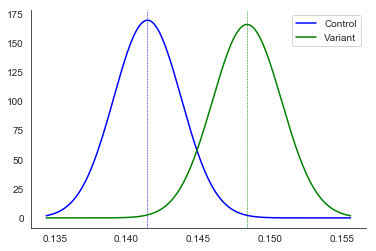

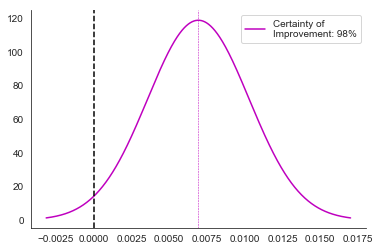

0.9804207729394717

In [33]:
certainty_improvement(22000, 21923, 3112, 3253)